# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, scale
from sklearn.decomposition import PCA

## Import file, dropping non-ordinal colums

In [2]:
diamonds = pd.read_csv('diamonds_clean.csv')
# diamonds = diamonds.loc[:, diamonds.dtypes == 'float64']

## Correlations and outliers

## Correlations

In [3]:
diamonds.corr().style.background_gradient()

,carat,depth,table,price,x,y,z,clarity_idx,color_idx,cut_idx
carat,1.000000,0.027063,0.181726,0.922207,0.977852,0.951945,0.959691,-0.353867,-0.292033,-0.136266
depth,0.027063,1.000000,-0.296986,-0.012077,-0.025812,-0.029845,0.094255,-0.067473,-0.046311,-0.220212
table,0.181726,-0.296986,1.000000,0.127854,0.196061,0.184042,0.152128,-0.160685,-0.027518,-0.431637
price,0.922207,-0.012077,0.127854,1.000000,0.887904,0.866568,0.867565,-0.148749,-0.173196,-0.055211
x,0.977852,-0.025812,0.196061,0.887904,1.000000,0.972708,0.974132,-0.373606,-0.271145,-0.127663
y,0.951945,-0.029845,0.184042,0.866568,0.972708,1.000000,0.953663,-0.358776,-0.263837,-0.123192
z,0.959691,0.094255,0.152128,0.867565,0.974132,0.953663,1.000000,-0.370256,-0.270015,-0.151994
clarity_idx,-0.353867,-0.067473,-0.160685,-0.148749,-0.373606,-0.358776,-0.370256,1.000000,-0.024651,0.189489
color_idx,-0.292033,-0.046311,-0.027518,-0.173196,-0.271145,-0.263837,-0.270015,-0.024651,1.000000,0.020303
cut_idx,-0.136266,-0.220212,-0.431637,-0.055211,-0.127663,-0.123192,-0.151994,0.189489,0.020303,1.000000


## carat

In [ ]:
sns.pairplot(
    diamonds.query(f'{diamonds.price.quantile(0.25)} <= price < {diamonds.price.quantile(0.75)}')
)


In [ ]:
sns.pairplot(
    diamonds.query(f'price >= {diamonds.price.quantile(0.75)}')
)


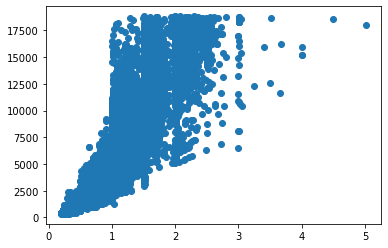

In [4]:
plt.scatter(x = diamonds['carat'], y = diamonds['price'])

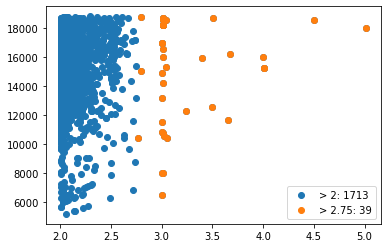

In [5]:
check1 = diamonds.query('carat > 2')
check2 = diamonds.query('carat > 2.75')

plt.scatter(check1.carat, check1.price)
plt.scatter(check2.carat, check2.price)

plt.legend([f'> 2: {check1.shape[0]}', f'> 2.75: {check2.shape[0]}'])

In [6]:
diamonds = diamonds.drop(check2.index)

## table

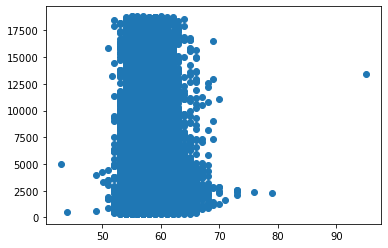

In [7]:
plt.scatter(x = diamonds.table, y = diamonds.price)

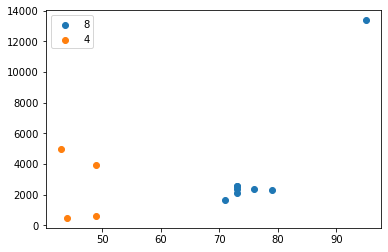

In [8]:
check1 = diamonds.query('table > 70')
check2 = diamonds.query('table < 50')

plt.scatter(check1.table, check1.price)
plt.scatter(check2.table, check2.price)

plt.legend([check1.shape[0], check2.shape[0]])

In [9]:
diamonds = diamonds.drop(check1.index | check2.index)

## depth

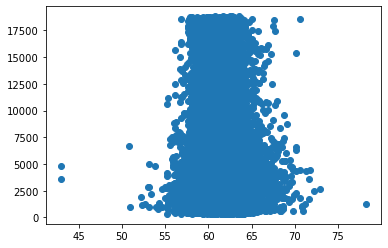

In [10]:
plt.scatter(x = diamonds.depth, y = diamonds.price)

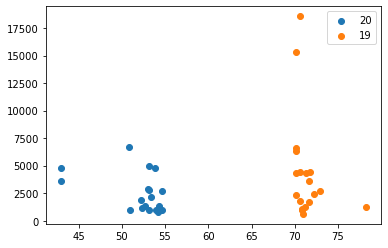

In [11]:
check1 = diamonds.query('depth < 55')
check2 = diamonds.query('depth > 70')

plt.scatter(check1.depth, check1.price)
plt.scatter(check2.depth, check2.price)

plt.legend([check1.shape[0], check2.shape[0]])

In [12]:
diamonds = diamonds.drop(check1.index | check2.index)

## x, y, z

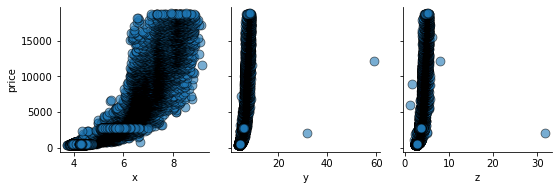

In [13]:
sns.pairplot( \
    diamonds, \
    diag_kind = 'kde', \
    x_vars = ['x', 'y', 'z'], y_vars = ['price'], \
    plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

In [14]:
diamonds = diamonds.drop(diamonds.query('y > 20 | z > 20').index)

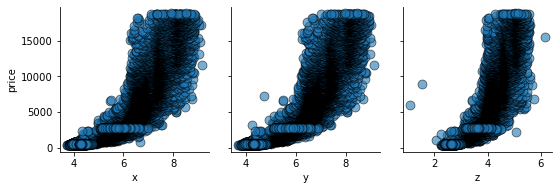

In [15]:
sns.pairplot( \
    diamonds, \
    diag_kind = 'kde', \
    x_vars = ['x', 'y', 'z'], y_vars = ['price'], \
    plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

#### PCA for x, y, z

In [16]:
pca_data = diamonds[['x', 'y', 'z']]

pca_x_y_z = PCA(n_components=1)
pca_x_y_z.fit(pca_data)

diamonds['pca_x_y_z'] = pca_x_y_z.transform(diamonds[['x', 'y', 'z']])
pca_x_y_z.explained_variance_ratio_

array([0.99722957])

## clarity

In [ ]:
for clarity in sorted(diamonds.clarity_idx.unique()):
    data = diamonds.query(f'clarity_idx == {clarity}')
    
    ax = \
        sns.pairplot( \
                data, \
                x_vars=['carat', 'depth', 'table', 'pca_x_y_z', 'clarity_idx', 'color_idx', 'cut_idx'],
                y_vars=['price'],
                diag_kind = 'kde', plot_kws = {'alpha': 0.2, 's': 80, 'edgecolor': 'k'}
            )
    
    ax.fig.suptitle(f'Clarity: {clarity} - {data.shape[0]}', y = 1.25)

## color

In [ ]:
for color in sorted(diamonds.color_idx.unique()):
    data = diamonds.query(f'color_idx == {color}')
    
    ax = \
        sns.pairplot( \
                data, \
                x_vars=['carat', 'depth', 'table', 'pca_x_y_z', 'clarity_idx', 'color_idx', 'cut_idx'],
                y_vars=['price'],
                diag_kind = 'kde', plot_kws = {'alpha': 0.2, 's': 80, 'edgecolor': 'k'}
            )
    
    ax.fig.suptitle(f'Color: {color} - {data.shape[0]}', y = 1.25)

## cut

In [ ]:
for cut in sorted(diamonds.cut_idx.unique()):
    data = diamonds.query(f'cut_idx == {cut}')
    
    ax = \
        sns.pairplot( \
                data, \
                x_vars=['carat', 'depth', 'table', 'pca_x_y_z', 'clarity_idx', 'color_idx', 'cut_idx'],
                y_vars=['price'],
                diag_kind = 'kde', plot_kws = {'alpha': 0.2, 's': 80, 'edgecolor': 'k'}
            )
    
    ax.fig.suptitle(f'cut: {cut} - {data.shape[0]}', y = 1.25)

### PCA for cut, depth, table


In [20]:
pca_data = diamonds[['cut_idx', 'depth', 'table']]

pca = PCA(n_components=1)
pca.fit(pca_data)

pca.explained_variance_ratio_

array([0.66534064])

### PCA for clarity, color, cut


In [21]:
pca_data = diamonds[['clarity_idx', 'color_idx', 'cut_idx']]

pca = PCA(n_components=1)
pca.fit(pca_data)

pca.explained_variance_ratio_

array([0.42728183])

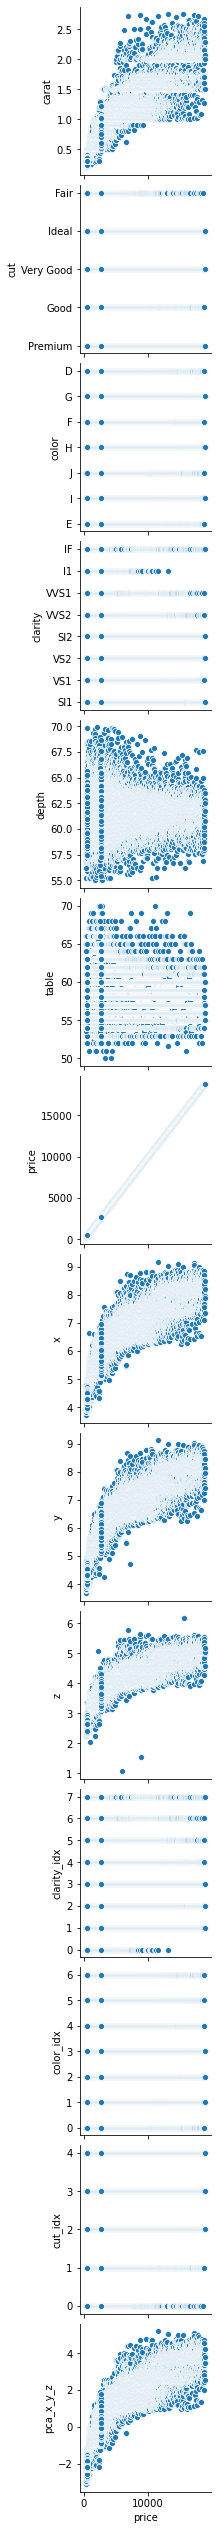

In [30]:



sns.pairplot(diamonds, x_vars=['price'], y_vars=diamonds.columns)

# Output

In [31]:
diamonds.to_csv('diamonds_data.csv', index = False)